In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Suppress FutureWarnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [4]:
df=pd.read_csv("superstore_final_dataset.csv",encoding='ISO-8859-1')
df.head()

,Row_ID,Order_ID,Order_Date,Ship_Date,Ship_Mode,Customer_ID,Customer_Name,Segment,Country,City,State,Postal_Code,Region,Product_ID,Category,Sub_Category,Product_Name,Sales
0,1,CA-2017-152156,8/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,8/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/6/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O Donnel,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O Donnel,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold N Roll Cart System,22.3680


In [5]:
df.describe()

,Row_ID,Postal_Code,Sales
count,9800.000000,9789.000000,9800.000000
mean,4900.500000,55273.322403,230.769059
std,2829.160653,32041.223413,626.651875
min,1.000000,1040.000000,0.444000
25%,2450.750000,23223.000000,17.248000
50%,4900.500000,58103.000000,54.490000
75%,7350.250000,90008.000000,210.605000
max,9800.000000,99301.000000,22638.480000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row_ID         9800 non-null   int64  
 1   Order_ID       9800 non-null   object 
 2   Order_Date     9800 non-null   object 
 3   Ship_Date      9800 non-null   object 
 4   Ship_Mode      9800 non-null   object 
 5   Customer_ID    9800 non-null   object 
 6   Customer_Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal_Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product_ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub_Category   9800 non-null   object 
 16  Product_Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

In [7]:
df["Order_Date"]=pd.to_datetime(df["Order_Date"],format='%d/%m/%Y')
df["Ship_Date"]=pd.to_datetime(df["Ship_Date"],format='%d/%m/%Y')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row_ID         9800 non-null   int64         
 1   Order_ID       9800 non-null   object        
 2   Order_Date     9800 non-null   datetime64[ns]
 3   Ship_Date      9800 non-null   datetime64[ns]
 4   Ship_Mode      9800 non-null   object        
 5   Customer_ID    9800 non-null   object        
 6   Customer_Name  9800 non-null   object        
 7   Segment        9800 non-null   object        
 8   Country        9800 non-null   object        
 9   City           9800 non-null   object        
 10  State          9800 non-null   object        
 11  Postal_Code    9789 non-null   float64       
 12  Region         9800 non-null   object        
 13  Product_ID     9800 non-null   object        
 14  Category       9800 non-null   object        
 15  Sub_Category   9800 n

In [9]:
df.isnull().sum()

Row_ID            0
Order_ID          0
Order_Date        0
Ship_Date         0
Ship_Mode         0
Customer_ID       0
Customer_Name     0
Segment           0
Country           0
City              0
State             0
Postal_Code      11
Region            0
Product_ID        0
Category          0
Sub_Category      0
Product_Name      0
Sales             0
dtype: int64

# Fill null values to Potal_Code column

In [10]:
post_code_val_count=df["Postal_Code"].value_counts().reset_index(name="value_conts")
post_code_val_count

,Postal_Code,value_conts
0,10035.0,253
1,10024.0,225
2,10009.0,220
3,94122.0,195
4,10011.0,193
...,...,...
621,32935.0,1
622,76248.0,1
623,32127.0,1
624,32503.0,1


In [11]:
df["Postal_Code"]=df["Postal_Code"].fillna(df["Postal_Code"].mode()[0])

In [12]:
df["Postal_Code"].isnull().sum()

0

# What is the total sales by region?


In [13]:
total_sales_by_region=df.groupby("Region")["Sales"].sum().reset_index()
total_sales_by_region

,Region,Sales
0,Central,492646.9132
1,East,669518.7260
2,South,389151.4590
3,West,710219.6845


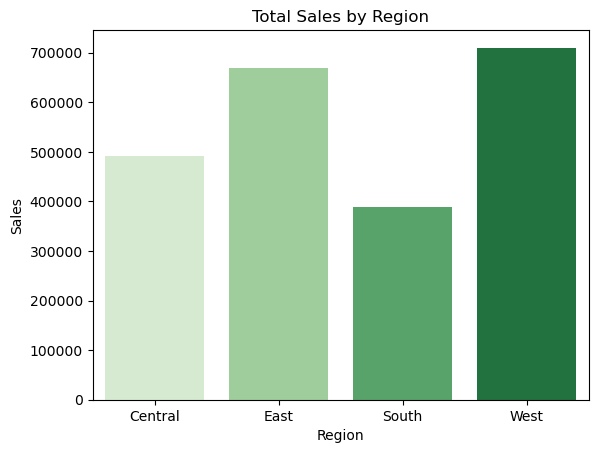

In [14]:
sns.barplot(data=total_sales_by_region,x="Region",y="Sales",palette="Greens")
plt.title("Total Sales by Region")
plt.show()

# What are the top 10 cities by sales?

In [15]:
top_10_cities_by_sales=df.groupby("City")["Sales"].sum().sort_values(ascending=False).reset_index().head(10)

In [16]:
top_10_cities_by_sales

,City,Sales
0,New York City,252462.5470
1,Los Angeles,173420.1810
2,Seattle,116106.3220
3,San Francisco,109041.1200
4,Philadelphia,108841.7490
5,Houston,63956.1428
6,Chicago,47820.1330
7,San Diego,47521.0290
8,Jacksonville,44713.1830
9,Detroit,42446.9440


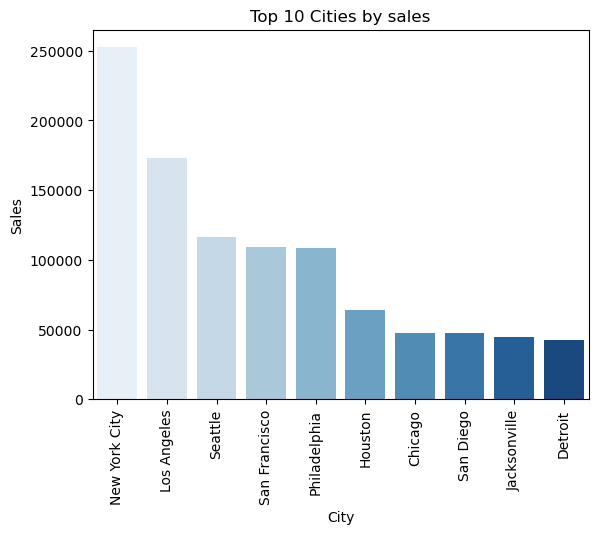

In [17]:
sns.barplot(x="City",y="Sales",data=top_10_cities_by_sales,palette="Blues")
plt.title("Top 10 Cities by sales")
plt.xticks(rotation=90)
plt.show()

# How does the sales distribution look across different categories?

In [18]:
sales_distribution_by_sale=df.groupby("Category")["Sales"].sum().reset_index()
sales_distribution_by_sale

,Category,Sales
0,Furniture,728658.5757
1,Office Supplies,705422.3340
2,Technology,827455.8730


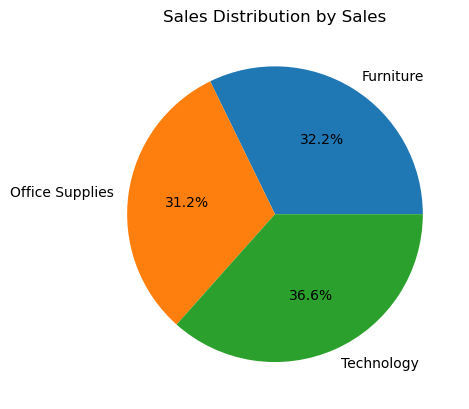

In [19]:
labels=["Furniture","Office Supplies","Technology"]
plt.pie(sales_distribution_by_sale["Sales"],labels=labels,autopct="%0.1f%%")
plt.title("Sales Distribution by Sales")
plt.show()

# What is the trend of sales over time?

In [20]:
sales_trend_over_time=df.groupby("Order_Date")["Sales"].sum().reset_index()
sales_trend_over_time

,Order_Date,Sales
0,2015-01-03,16.4480
1,2015-01-04,288.0600
2,2015-01-05,19.5360
3,2015-01-06,4407.1000
4,2015-01-07,87.1580
...,...,...
1225,2018-12-26,814.5940
1226,2018-12-27,177.6360
1227,2018-12-28,1657.3508
1228,2018-12-29,2915.5340


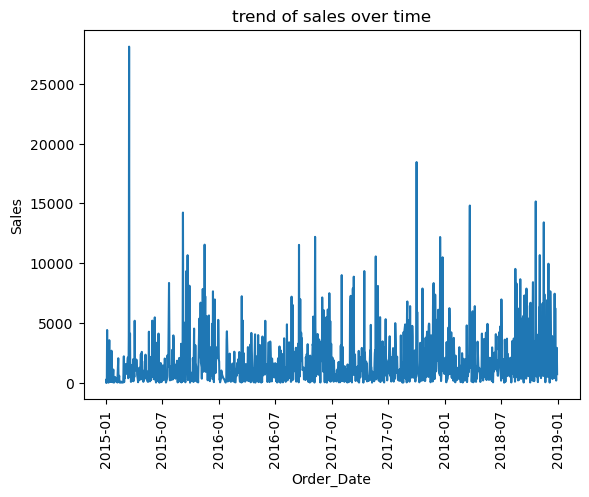

In [21]:
sns.lineplot(data=sales_trend_over_time,x="Order_Date",y="Sales")
plt.title("trend of sales over time")
plt.xticks(rotation=90)
plt.show()

# What is the relationship between shipping mode and sales?

In [22]:
relation_between_shipping_sales=df.groupby("Ship_Mode")["Sales"].sum().sort_values(ascending=False).reset_index()
relation_between_shipping_sales

,Ship_Mode,Sales
0,Standard Class,1.340831e+06
1,Second Class,4.499142e+05
2,First Class,3.455723e+05
3,Same Day,1.252190e+05


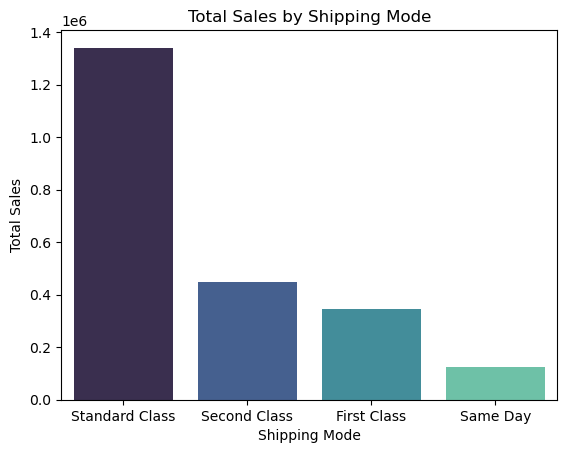

In [23]:
sns.barplot(x='Ship_Mode', y='Sales', data=relation_between_shipping_sales, palette='mako')
plt.title('Total Sales by Shipping Mode')
plt.xlabel('Shipping Mode')
plt.ylabel('Total Sales')
plt.show()

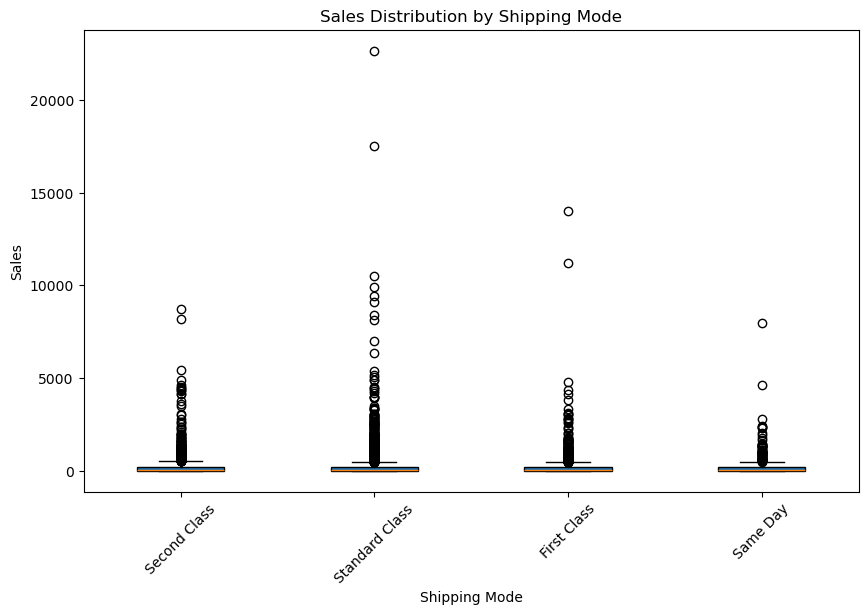

In [24]:
grouped_sales = [df[df['Ship_Mode'] == mode]['Sales'] for mode in df['Ship_Mode'].unique()]

plt.figure(figsize=(10, 6))
plt.boxplot(grouped_sales, labels=df['Ship_Mode'].unique(), patch_artist=True)
plt.title('Sales Distribution by Shipping Mode')
plt.xlabel('Shipping Mode')
plt.ylabel('Sales')
plt.xticks(rotation=45)
plt.show()

# What are the top-selling products?

In [25]:
top_selling_products = df.groupby('Product_Name')['Sales'].sum().sort_values(ascending=False).reset_index()
top_selling_products

,Product_Name,Sales
0,Canon imageCLASS 2200 Advanced Copier,61599.824
1,Fellowes PB500 Electric Punch Plastic Comb Bin...,27453.384
2,Cisco TelePresence System EX90 Videoconferenci...,22638.480
3,HON 5400 Series Task Chairs for Big and Tall,21870.576
4,GBC DocuBind TL300 Electric Binding System,19823.479
...,...,...
1844,Acme Serrated Blade Letter Opener,7.632
1845,Grip Seal Envelopes,7.072
1846,Xerox 20,6.480
1847,Avery 5,5.760


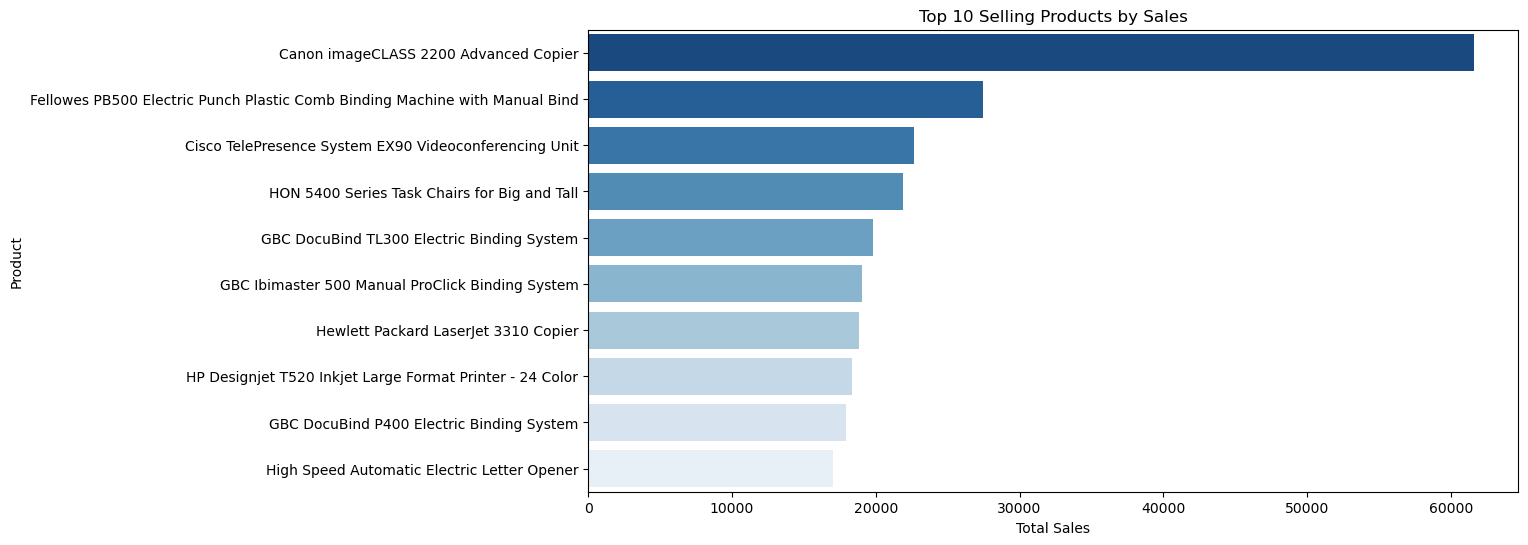

In [26]:
plt.figure(figsize=(12, 6))
sns.barplot(y='Product_Name', x='Sales', data=top_selling_products.head(10), palette='Blues_r')
plt.title('Top 10 Selling Products by Sales')
plt.xlabel('Total Sales')
plt.ylabel('Product')
plt.show()


# Which customer segment contributes the most to the sales?

In [27]:
customer_segment_most_sales=df.groupby("Segment")["Sales"].sum().reset_index()
customer_segment_most_sales

,Segment,Sales
0,Consumer,1.148061e+06
1,Corporate,6.884941e+05
2,Home Office,4.249822e+05


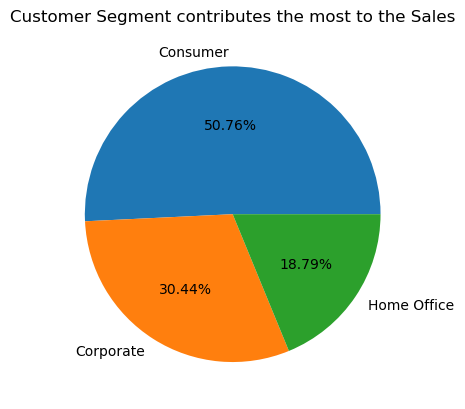

In [28]:
labels=["Consumer","Corporate","Home Office"]
plt.pie(customer_segment_most_sales["Sales"],labels=labels,autopct="%0.2f%%")
plt.title("Customer Segment contributes the most to the Sales")
plt.show()

# What is the distribution of sales by state?


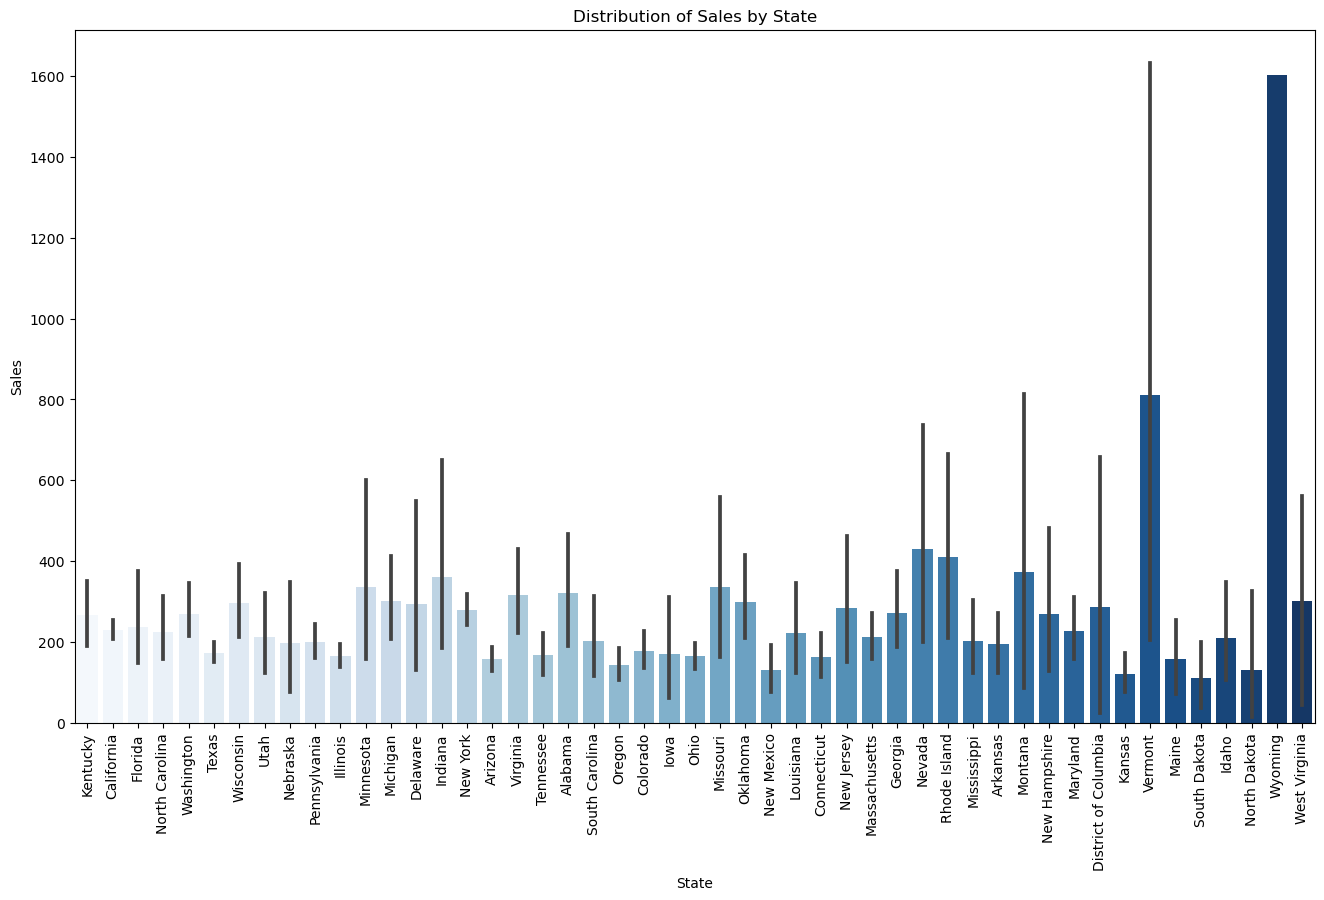

In [29]:
plt.figure(figsize=(16,9))
sns.barplot(data=df,x="State",y="Sales",palette="Blues")
plt.title("Distribution of Sales by State")
plt.xticks(rotation=90)
plt.show()

# How do sales vary by sub-category within each category?

In [30]:
sales_by_sub_catgory_in_category=df.groupby(["Category","Sub_Category"])["Sales"].sum().reset_index()
sales_by_sub_catgory_in_category

,Category,Sub_Category,Sales
0,Furniture,Bookcases,113813.1987
1,Furniture,Chairs,322822.7310
2,Furniture,Furnishings,89212.0180
3,Furniture,Tables,202810.6280
4,Office Supplies,Appliances,104618.4030
5,Office Supplies,Art,26705.4100
6,Office Supplies,Binders,200028.7850
7,Office Supplies,Envelopes,16128.0460
8,Office Supplies,Fasteners,3001.9600
9,Office Supplies,Labels,12347.7260


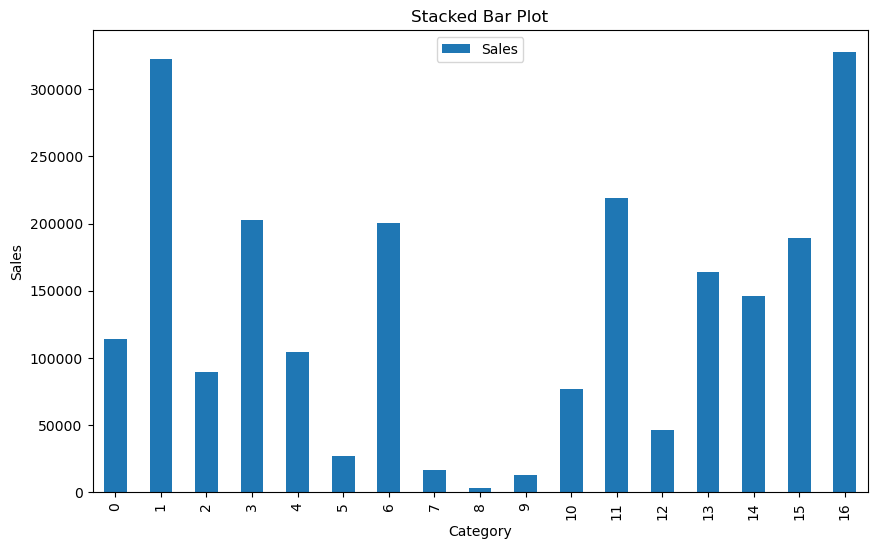

In [31]:
sales_by_sub_catgory_in_category.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Stacked Bar Plot')
plt.ylabel('Sales')
plt.xlabel('Category')
plt.show()

# Which states have the highest average sales per order?


In [32]:
highest_ave_sale_per_order=df.groupby(["State","Order_Date"])["Sales"].mean().sort_values(ascending=False).reset_index()
highest_ave_sale_per_order

,State,Order_Date,Sales
0,Delaware,2018-11-17,10499.970
1,Michigan,2017-12-17,9892.740
2,New York,2015-12-14,6999.960
3,New York,2015-11-19,4548.810
4,Pennsylvania,2018-08-17,4416.174
...,...,...,...
4142,Texas,2016-03-10,1.112
4143,Oregon,2018-07-09,1.080
4144,Texas,2015-09-26,0.876
4145,Pennsylvania,2015-03-31,0.852


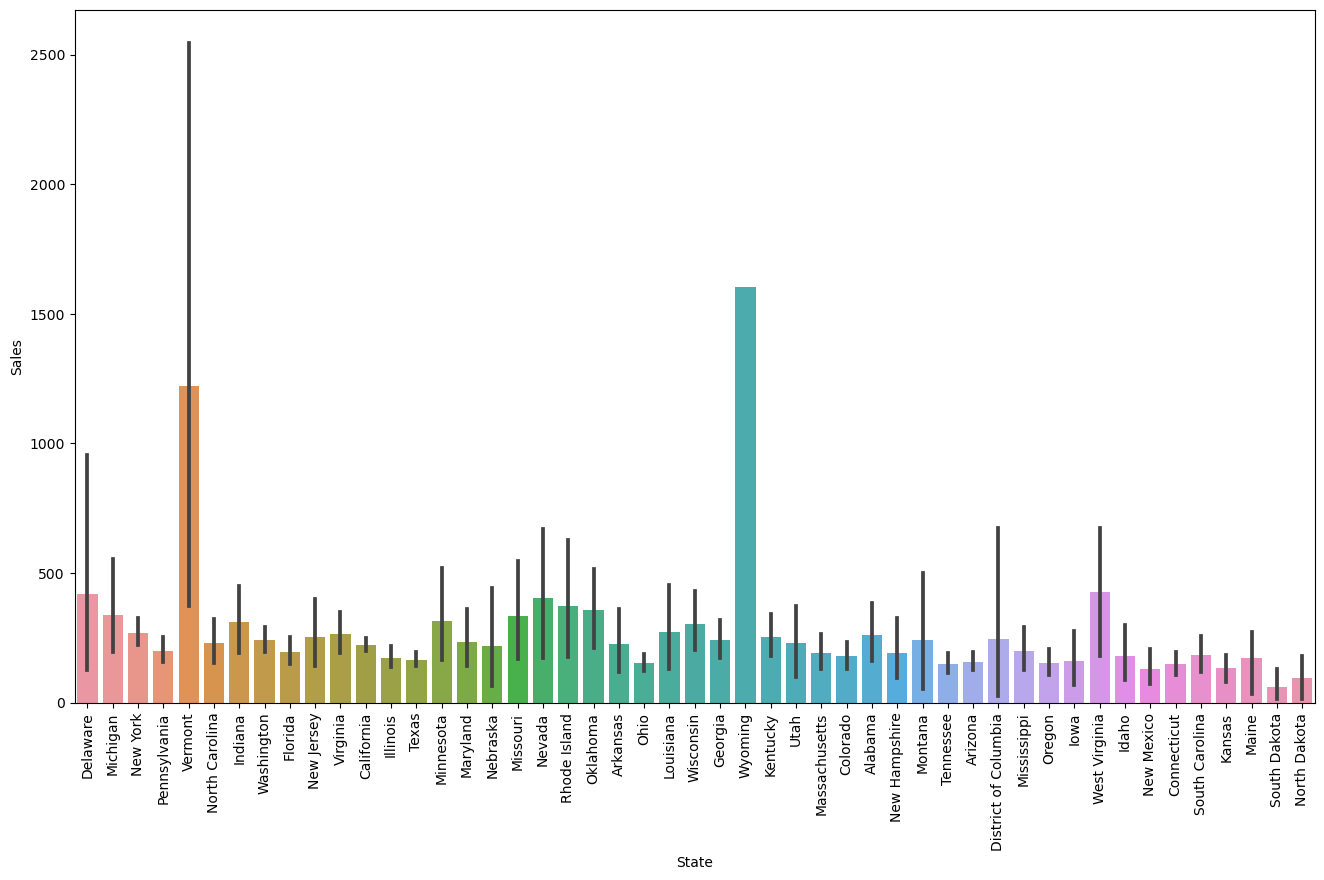

In [33]:
plt.figure(figsize=(16,9))
sns.barplot(data=highest_ave_sale_per_order,x="State",y="Sales")
plt.title("")
plt.xticks(rotation=90)
plt.show()

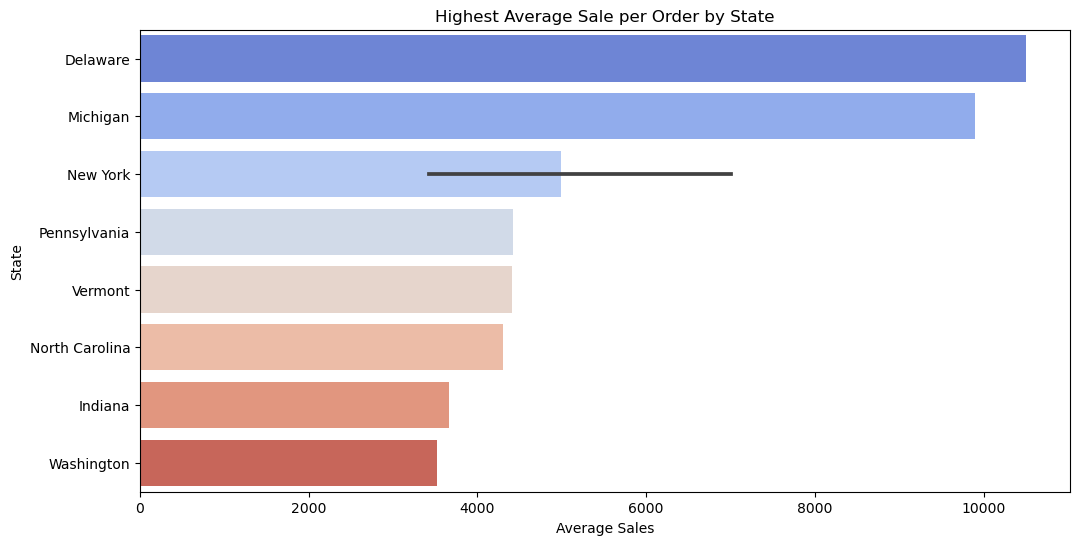

In [34]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Sales', y='State', data=highest_ave_sale_per_order.head(10), palette='coolwarm')
plt.title('Highest Average Sale per Order by State')
plt.xlabel('Average Sales')
plt.ylabel('State')
plt.show()

# How does the shipping mode affect the delivery time (Order Date vs Ship Date)?

In [35]:
df["Delivery_Days"]=(df["Ship_Date"]-df["Order_Date"]).dt.days

In [36]:
delivery_time_by_ship_mode=df.groupby("Ship_Mode")["Delivery_Days"].value_counts().sort_values(ascending=False).reset_index(name="Count")

In [37]:
delivery_time_by_ship_mode

,Ship_Mode,Delivery_Days,Count
0,Standard Class,4,2349
1,Standard Class,5,1724
2,Standard Class,6,1170
3,Second Class,2,738
4,Standard Class,7,615
5,First Class,3,605
6,First Class,2,557
7,Same Day,0,514
8,Second Class,5,423
9,Second Class,3,372


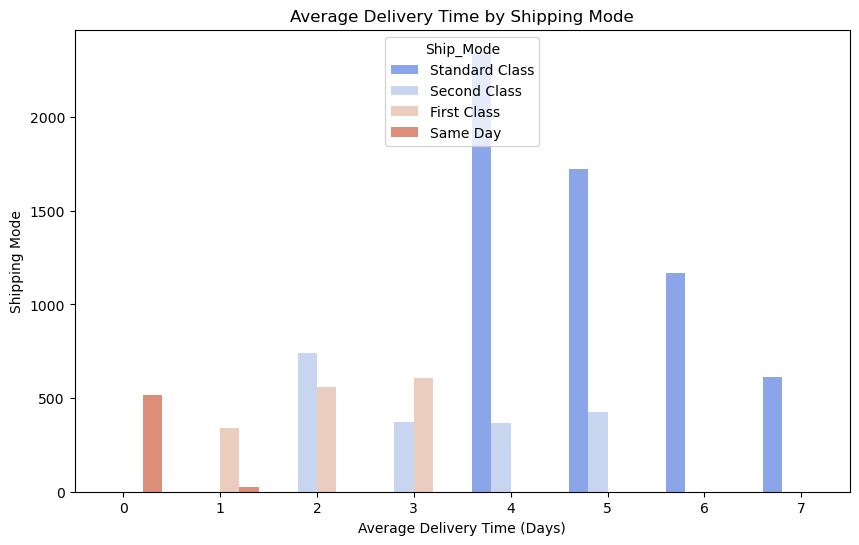

In [38]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Delivery_Days', y='Count',hue="Ship_Mode", data=delivery_time_by_ship_mode, palette='coolwarm')
plt.title('Average Delivery Time by Shipping Mode')
plt.xlabel('Average Delivery Time (Days)')
plt.ylabel('Shipping Mode')
plt.show()

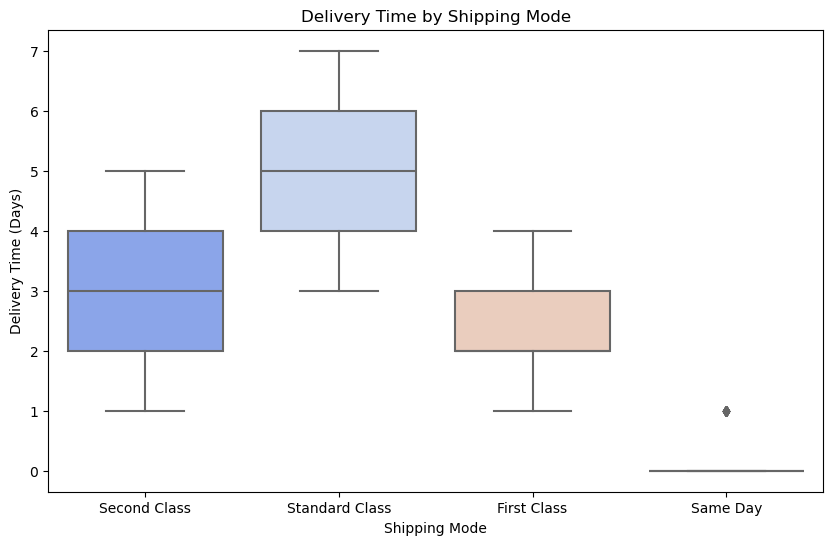

In [39]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Ship_Mode', y='Delivery_Days', data=df, palette='coolwarm')
plt.title('Delivery Time by Shipping Mode')
plt.ylabel('Delivery Time (Days)')
plt.xlabel('Shipping Mode')
plt.show()

# What is the total sales by product sub-category?


In [40]:
total_sales_by_sub_category = df.groupby('Sub_Category')['Sales'].sum().sort_values(ascending=False).reset_index()
total_sales_by_sub_category

,Sub_Category,Sales
0,Phones,327782.4480
1,Chairs,322822.7310
2,Storage,219343.3920
3,Tables,202810.6280
4,Binders,200028.7850
5,Machines,189238.6310
6,Accessories,164186.7000
7,Copiers,146248.0940
8,Bookcases,113813.1987
9,Appliances,104618.4030


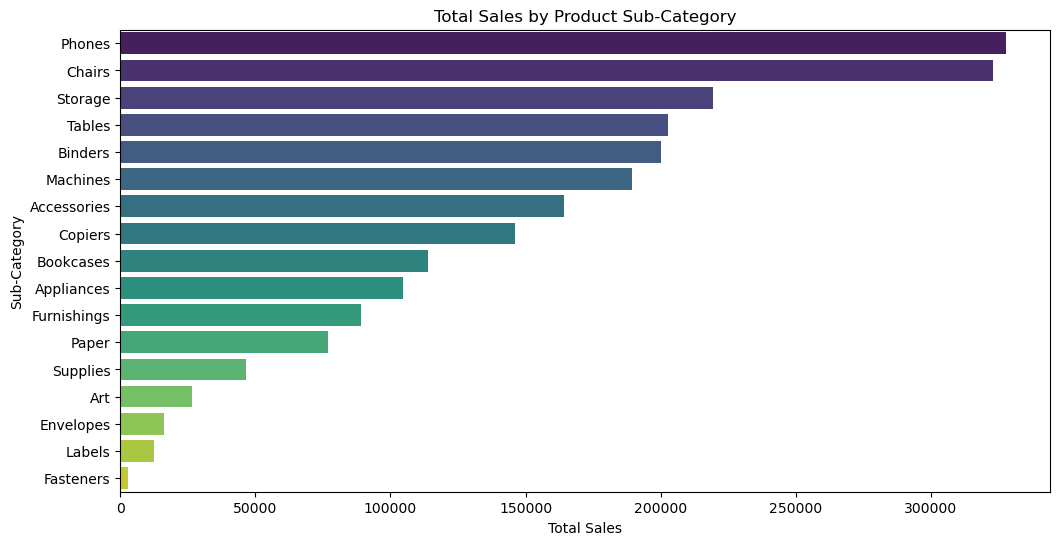

In [41]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Sales', y='Sub_Category', data=total_sales_by_sub_category, palette='viridis')
plt.title('Total Sales by Product Sub-Category')
plt.xlabel('Total Sales')
plt.ylabel('Sub-Category')
plt.show()

# How are sales distributed by customer name?

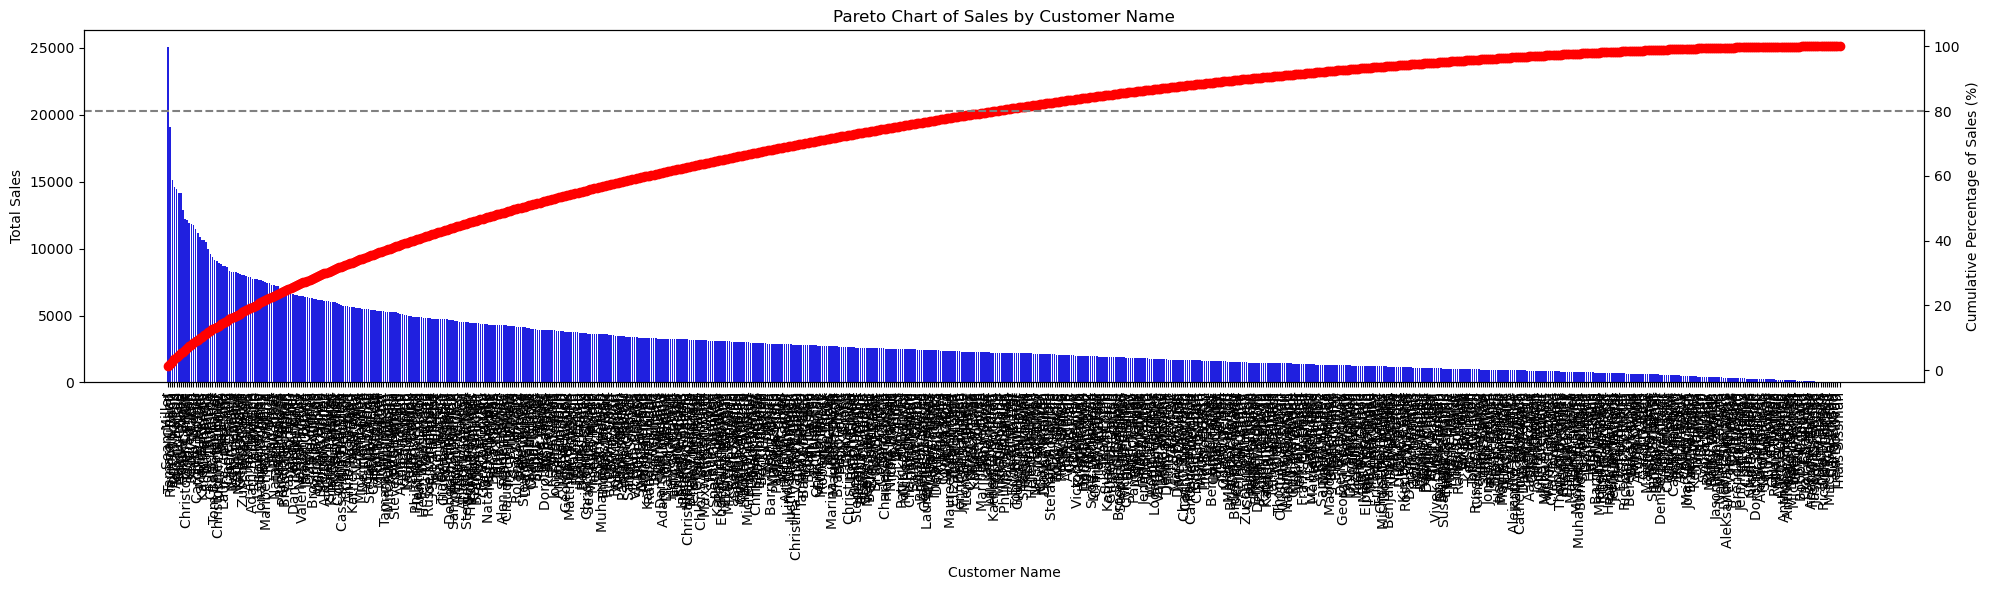

In [42]:


# Step 1: Group by 'Customer Name' and sum the sales
sales_by_customer = df.groupby('Customer_Name')['Sales'].sum().reset_index()

# Step 2: Sort customers by total sales in descending order
sales_by_customer = sales_by_customer.sort_values(by='Sales', ascending=False)

# Step 3: Calculate the cumulative percentage of sales
sales_by_customer['Cumulative_Sales'] = sales_by_customer['Sales'].cumsum()
sales_by_customer['Cumulative_Percentage'] = 100 * sales_by_customer['Cumulative_Sales'] / sales_by_customer['Sales'].sum()

# Step 4: Plotting the Pareto chart
fig, ax1 = plt.subplots(figsize=(20, 6))

# Bar plot for sales
sns.barplot(x='Customer_Name', y='Sales', data=sales_by_customer, ax=ax1, color='b')
ax1.set_title('Pareto Chart of Sales by Customer Name')
ax1.set_xlabel('Customer Name')
ax1.set_ylabel('Total Sales')
ax1.tick_params(axis='x', rotation=90)  # Rotate x-axis labels

# Step 5: Plot the cumulative percentage as a line on a secondary y-axis
ax2 = ax1.twinx()  # Create a second y-axis
ax2.plot(sales_by_customer['Customer_Name'], sales_by_customer['Cumulative_Percentage'], color='r', marker='o', linestyle='-', linewidth=2)
ax2.set_ylabel('Cumulative Percentage of Sales (%)')
ax2.axhline(80, color='gray', linestyle='--')  # Optionally, mark the 80% threshold

# Show the plot
plt.tight_layout()
plt.show()


# How do sales compare across different regions?

In [43]:
sales_across_on_region=df.groupby("Region")["Sales"].sum().reset_index()
sales_across_on_region

,Region,Sales
0,Central,492646.9132
1,East,669518.7260
2,South,389151.4590
3,West,710219.6845


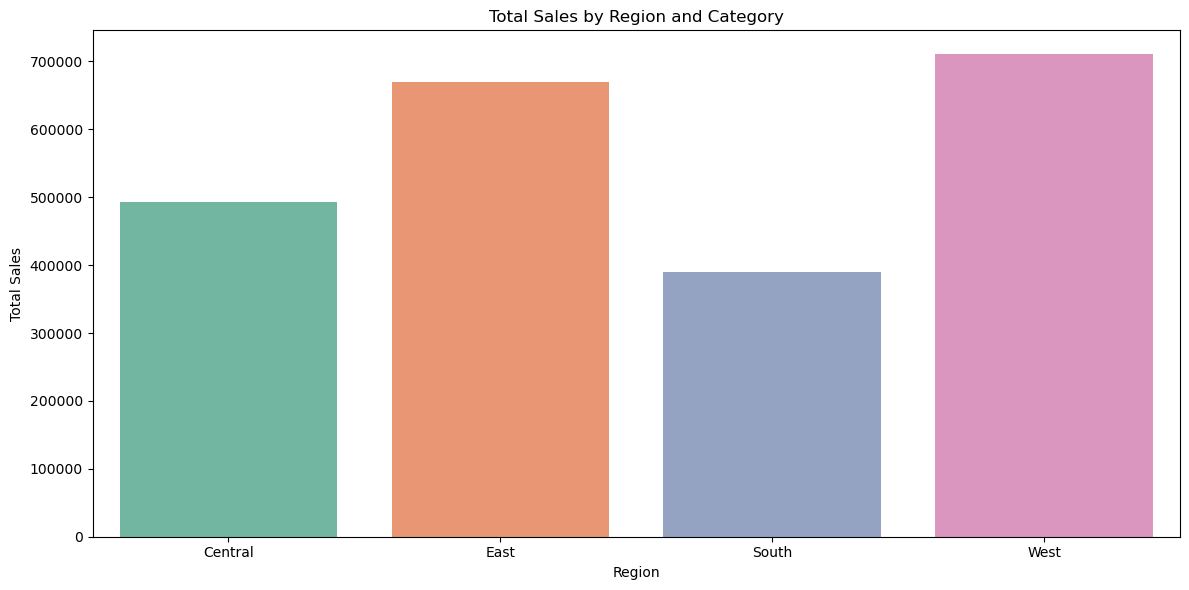

In [44]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Region', y='Sales', data=sales_across_on_region, palette='Set2')
plt.title('Total Sales by Region and Category')
plt.xlabel('Region')
plt.ylabel('Total Sales')
plt.tight_layout()
plt.show()

# What is the average sales per order over time?

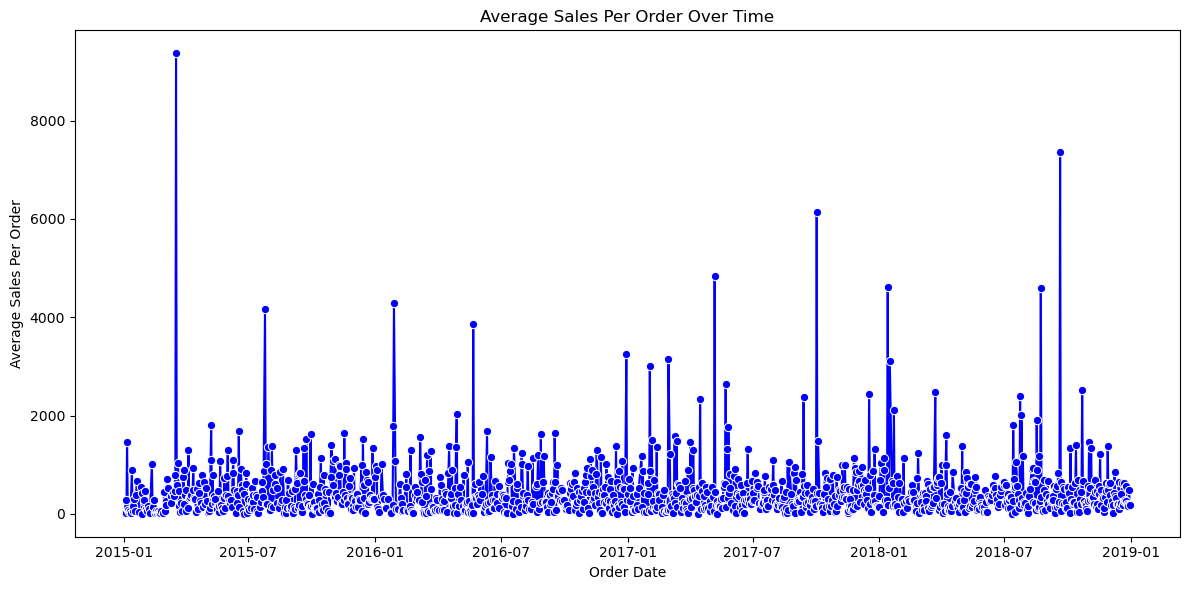

In [45]:
daily_sales = df.groupby('Order_Date').agg(
    total_sales=('Sales', 'sum'),
    order_count=('Order_ID', 'nunique') 
).reset_index()

daily_sales['avg_sales_per_order'] = daily_sales['total_sales'] / daily_sales['order_count']

plt.figure(figsize=(12, 6))
sns.lineplot(x='Order_Date', y='avg_sales_per_order', data=daily_sales, color='b', marker='o')

plt.title('Average Sales Per Order Over Time')
plt.xlabel('Order Date')
plt.ylabel('Average Sales Per Order')
plt.tight_layout()
plt.show()


# Which products are most frequently ordered?

In [46]:
product_order_count = df.groupby('Product_Name')['Order_ID'].count().sort_values(ascending = False).reset_index()
product_order_count = product_order_count.rename(columns={'Order_ID': 'Order_Count'})
product_order_count

,Product_Name,Order_Count
0,Staple envelope,47
1,Staples,46
2,Easy-staple paper,44
3,Avery Non-Stick Binders,20
4,Staples in misc. colors,18
...,...,...
1844,SanDisk Cruzer 8 GB USB Flash Drive,1
1845,Xerox 1926,1
1846,"Bush Saratoga Collection 5-Shelf Bookcase, Han...",1
1847,"Bush Westfield Collection Bookcases, Dark Cher...",1


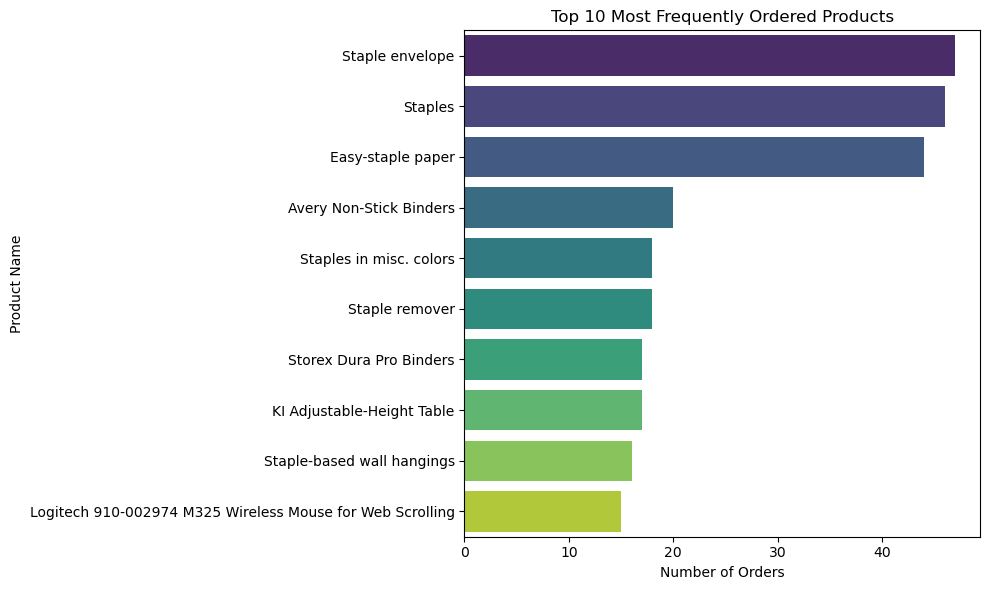

In [47]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Order_Count', y='Product_Name', data=product_order_count.head(10), palette='viridis')
plt.title('Top 10 Most Frequently Ordered Products')
plt.xlabel('Number of Orders')
plt.ylabel('Product Name')
plt.tight_layout()
plt.show()

# How does sales performance vary by city?

In [48]:
sales_by_city = df.groupby('City')['Sales'].sum().sort_values(ascending=False).reset_index()
sales_by_city

,City,Sales
0,New York City,252462.547
1,Los Angeles,173420.181
2,Seattle,116106.322
3,San Francisco,109041.120
4,Philadelphia,108841.749
...,...,...
524,Ormond Beach,2.808
525,Pensacola,2.214
526,Jupiter,2.064
527,Elyria,1.824


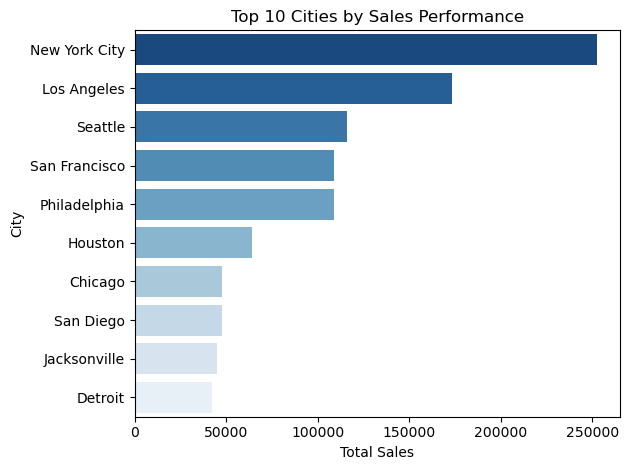

In [49]:
sns.barplot(x='Sales', y='City', data=sales_by_city.head(10), palette='Blues_r')
plt.title('Top 10 Cities by Sales Performance')
plt.xlabel('Total Sales')
plt.ylabel('City')
plt.tight_layout()
plt.show()

# What are the top 10 most profitable cities?

In [50]:
city_sales = df.groupby('City')['Sales'].sum().sort_values(ascending=False).reset_index()
city_sales

,City,Sales
0,New York City,252462.547
1,Los Angeles,173420.181
2,Seattle,116106.322
3,San Francisco,109041.120
4,Philadelphia,108841.749
...,...,...
524,Ormond Beach,2.808
525,Pensacola,2.214
526,Jupiter,2.064
527,Elyria,1.824


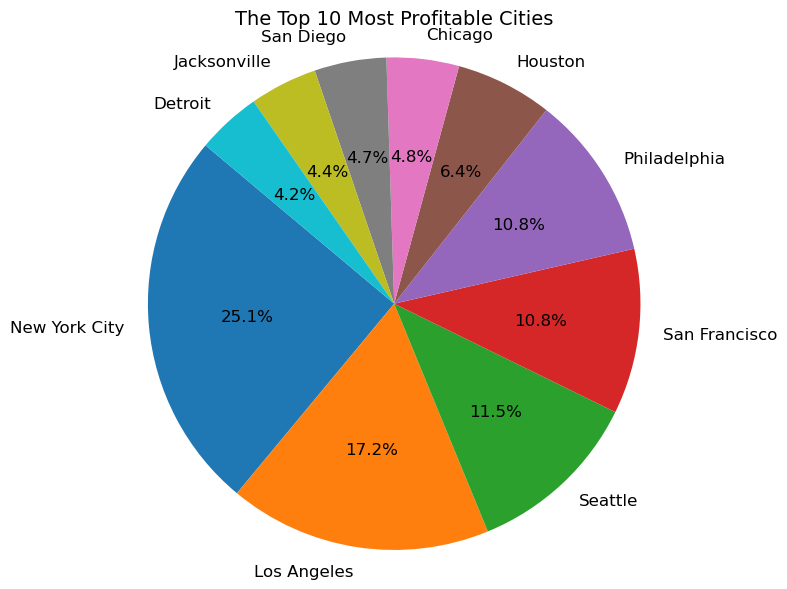

In [51]:
labels=["New York City","Los Angeles","Seattle","San Francisco","Philadelphia","Houston","Chicago","San Diego","Jacksonville","Detroit"]
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']

plt.figure(figsize=(8, 6))
plt.pie(city_sales["Sales"].head(10), labels=labels, colors=colors, autopct='%1.1f%%', startangle=140, textprops={'fontsize': 12})
plt.axis('equal')
plt.title('The Top 10 Most Profitable Cities', fontsize=14)
plt.tight_layout()
plt.show()

# What is the correlation between product categories and the regions they are sold in

# What is the percentage contribution of each product category to the overall sales?

In [52]:
category_sales = df.groupby('Category')['Sales'].sum()
total_sales = df['Sales'].sum()
category_percentage = ((category_sales / total_sales) * 100).reset_index()
category_percentage


,Category,Sales
0,Furniture,32.219621
1,Office Supplies,31.192167
2,Technology,36.588212


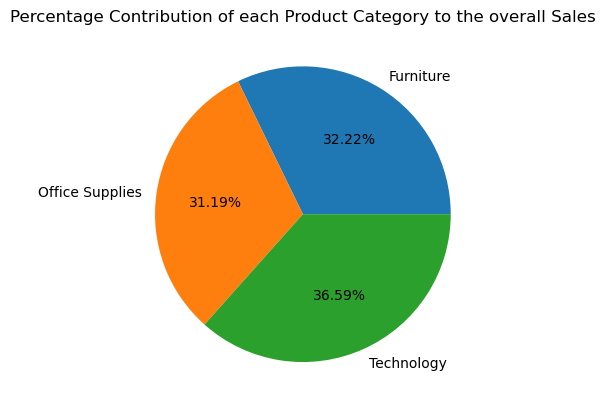

In [53]:
labels=["Furniture","Office Supplies","Technology"]
plt.pie(category_percentage["Sales"],labels=labels,autopct="%0.2f%%")
plt.title("Percentage Contribution of each Product Category to the overall Sales")
plt.show()

# How do sales differ by customer segment and region?

In [54]:
customer_segment_and_region_differ_by_sale=df.groupby(["Segment","Region"])["Sales"].sum().reset_index()
customer_segment_and_region_differ_by_sale

,Segment,Region,Sales
0,Consumer,Central,250210.5220
1,Consumer,East,347906.6050
2,Consumer,South,194702.2130
3,Consumer,West,355241.1910
4,Corporate,Central,152031.4968
5,Corporate,East,195897.4250
6,Corporate,South,120546.8745
7,Corporate,West,220018.2785
8,Home Office,Central,90404.8944
9,Home Office,East,125714.6960


# What is the sales distribution by month

In [55]:
df["Months"]=df["Order_Date"].dt.month


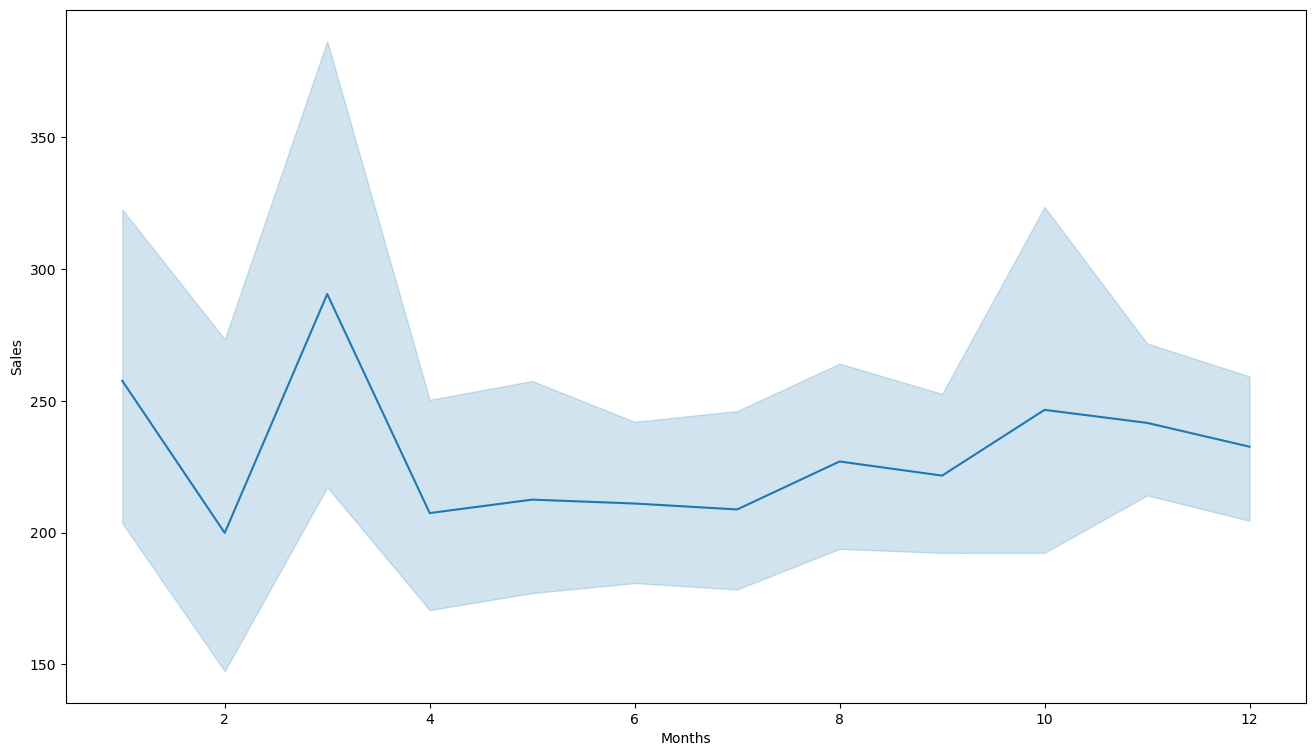

In [56]:
plt.figure(figsize=(16,9))
sns.lineplot(data=df,x="Months",y="Sales")
plt.show()

In [57]:
df.head()

,Row_ID,Order_ID,Order_Date,Ship_Date,Ship_Mode,Customer_ID,Customer_Name,Segment,Country,City,State,Postal_Code,Region,Product_ID,Category,Sub_Category,Product_Name,Sales,Delivery_Days,Months
0,1,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,3,11
1,2,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,11
2,3,CA-2017-138688,2017-06-12,2017-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,4,6
3,4,US-2016-108966,2016-10-11,2016-10-18,Standard Class,SO-20335,Sean O Donnel,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,7,10
4,5,US-2016-108966,2016-10-11,2016-10-18,Standard Class,SO-20335,Sean O Donnel,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold N Roll Cart System,22.3680,7,10


# How does sales performance vary across different states?

In [61]:
sales_per_vary_different_by_state=df.groupby("State")["Sales"].mean().reset_index()

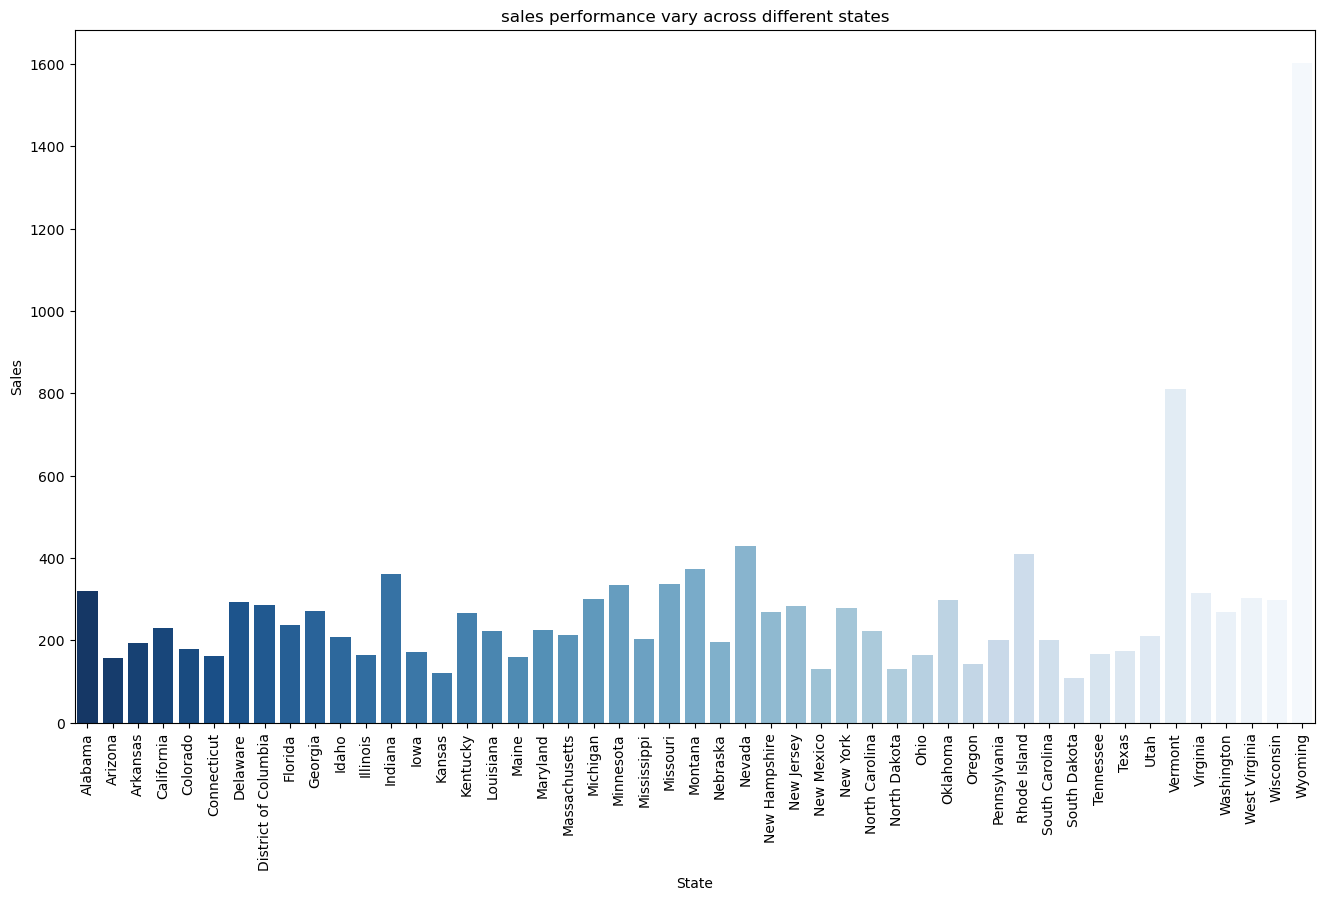

In [63]:
plt.figure(figsize=(16,9))
sns.barplot(data=sales_per_vary_different_by_state,x="State",y="Sales",palette="Blues_r")
plt.title("sales performance vary across different states")
plt.xticks(rotation=90)
plt.show()

# Which product sub-categories generate the highest revenue in each region?

In [70]:
sub_cat_generate_highest_revenue_in_each_region=df.groupby(["Region","Sub_Category"])["Sales"].mean().sort_values(ascending=False).unstack()
sub_cat_generate_highest_revenue_in_each_region.reset_index()
sub_cat_generate_highest_revenue_in_each_region

Sub_Category,Accessories,Appliances,Art,Binders,Bookcases,Chairs,Copiers,Envelopes,Fasteners,Furnishings,Labels,Machines,Paper,Phones,Storage,Supplies,Tables
Region,,,,,,,,,,,,,,,,,
Central,188.174149,173.580598,32.835360,157.085669,485.177780,545.515073,2328.723125,78.229379,14.520189,75.838404,32.473813,1276.065905,54.904115,365.177421,221.499707,262.982556,543.819042
East,216.286887,277.390878,33.026551,120.036944,625.990486,572.979096,2660.973100,59.117800,13.438000,102.346640,24.332514,1786.653108,53.237368,374.099858,292.947916,204.910308,491.255937
South,215.249232,241.053407,32.217314,152.424751,389.262929,520.223791,1328.536571,61.954741,17.355724,105.325062,36.627812,2993.942222,63.722826,417.973655,277.567717,286.859586,876.604240
West,238.708685,224.038842,36.807445,119.423448,447.098627,492.725123,2020.404609,62.226364,12.807831,97.932527,44.363681,1088.310821,59.576423,358.459692,263.331544,268.338388,716.957752


<Figure size 1200x800 with 0 Axes>

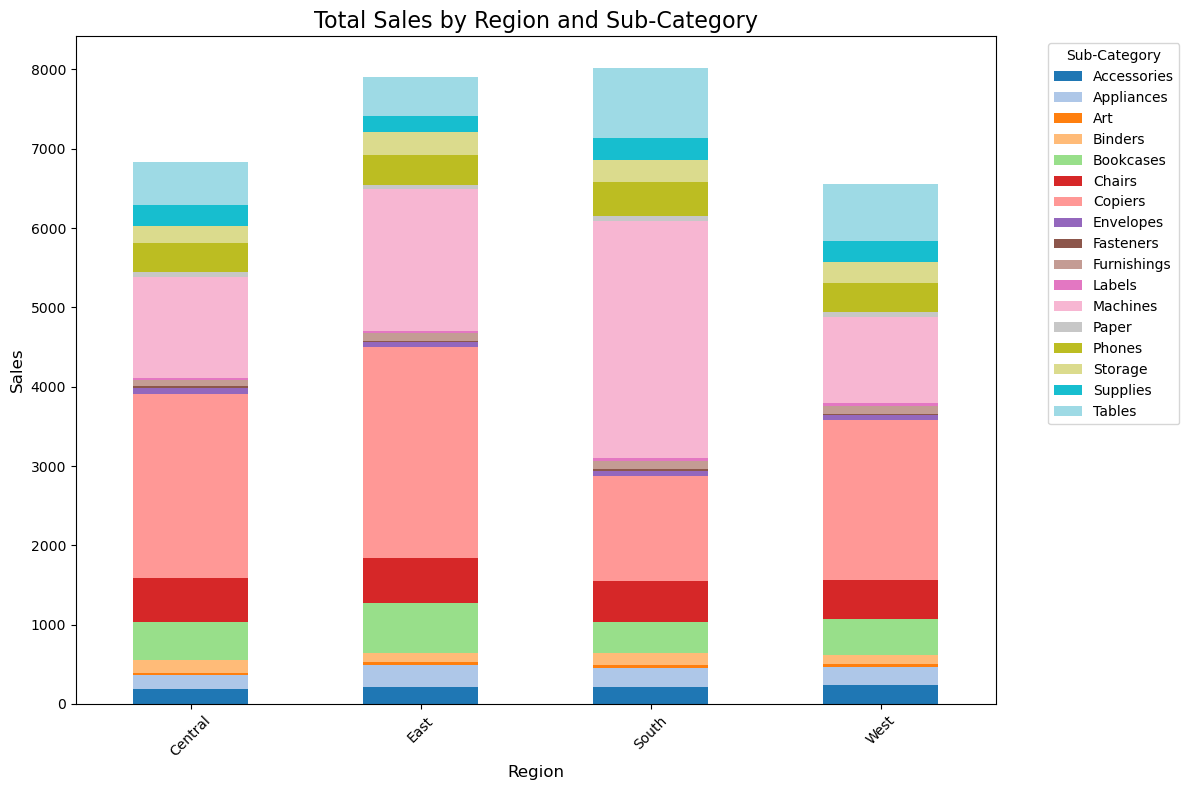

In [71]:
plt.figure(figsize=(12, 8))
sub_cat_generate_highest_revenue_in_each_region.plot(kind='bar', stacked=True, colormap='tab20', figsize=(12,8))

plt.title('Total Sales by Region and Sub-Category', fontsize=16)
plt.xlabel('Region', fontsize=12)
plt.ylabel('Sales', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Sub-Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# How are sales distributed across different shipping modes?


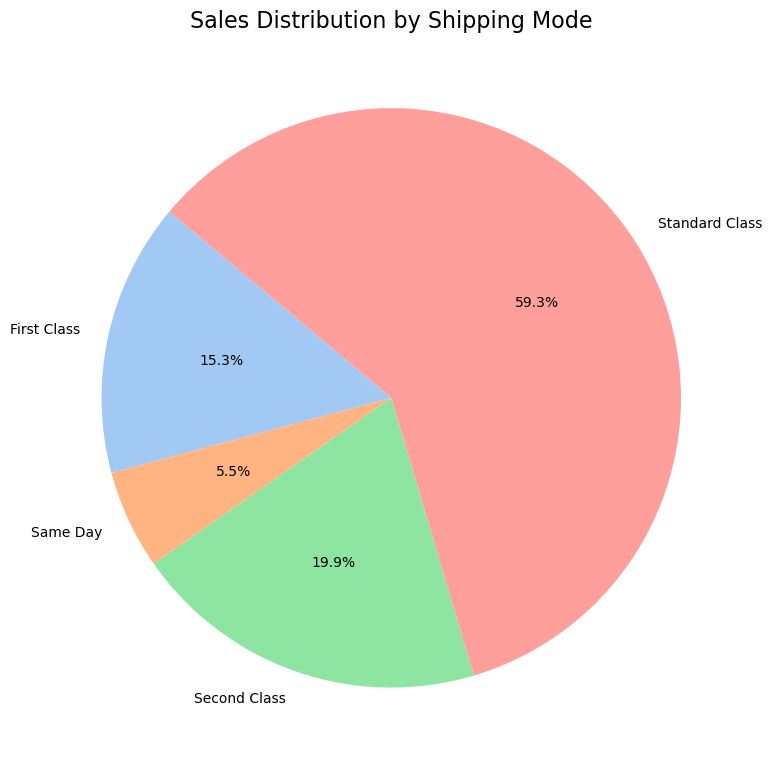

In [81]:
ship_mode_sales = df.groupby('Ship_Mode')['Sales'].sum()
plt.figure(figsize=(8, 8))
plt.pie(ship_mode_sales, labels=ship_mode_sales.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
plt.title('Sales Distribution by Shipping Mode', fontsize=16)
plt.tight_layout()
plt.show()

# What are the top customer names contributing to the sales?


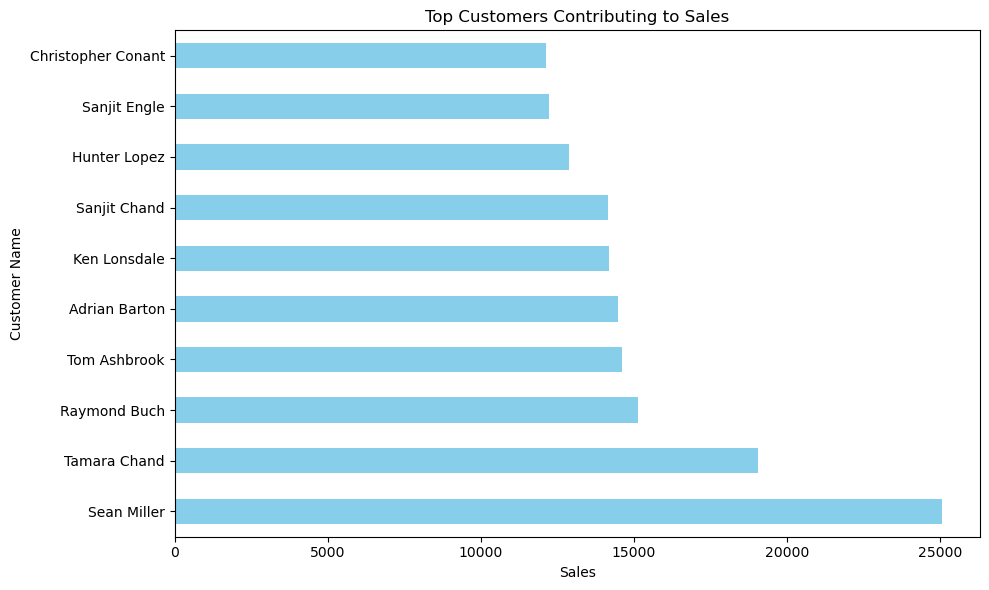

In [82]:
customer_sales = df.groupby('Customer_Name')['Sales'].sum().sort_values(ascending=False)
top_customers = customer_sales.head(10)

plt.figure(figsize=(10, 6))
top_customers.plot(kind='barh', color='skyblue')
plt.xlabel('Sales')
plt.ylabel('Customer Name')
plt.title('Top Customers Contributing to Sales')
plt.tight_layout()
plt.show()

# What is the average sales per customer across segments?

In [89]:
customer_sales_segment = df.groupby(['Segment', 'Customer_Name'])['Sales'].sum()
avg_sales_per_customer = customer_sales_segment.groupby('Segment').mean().reset_index()
avg_sales_per_customer

,Segment,Sales
0,Consumer,2806.993963
1,Corporate,2917.347775
2,Home Office,2871.501195


# What is the sales distribution across different product categories over time?

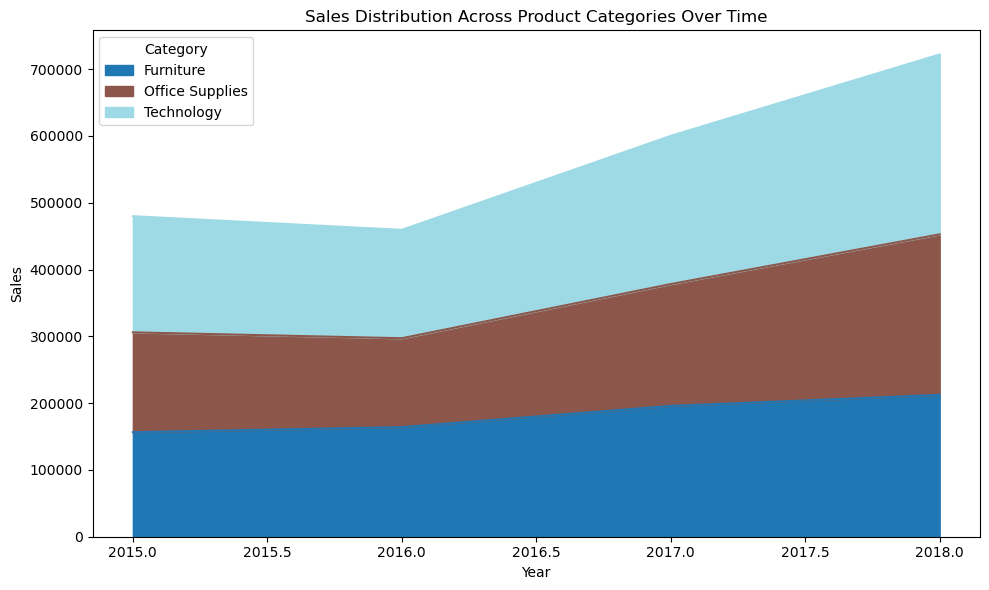

In [91]:
df['Year'] = df['Order_Date'].dt.year

category_sales_over_time = df.groupby(['Year', 'Category'])['Sales'].sum().unstack()

category_sales_over_time.plot(kind='area', stacked=True, figsize=(10, 6), colormap='tab20')
plt.xlabel('Year')
plt.ylabel('Sales')
plt.title('Sales Distribution Across Product Categories Over Time')
plt.tight_layout()
plt.show()

# Which states have the highest sales per postal code?

In [98]:
highest_sales_per_postal_code=df.groupby("State")["Postal_Code"].count().sort_values(ascending=False).reset_index()


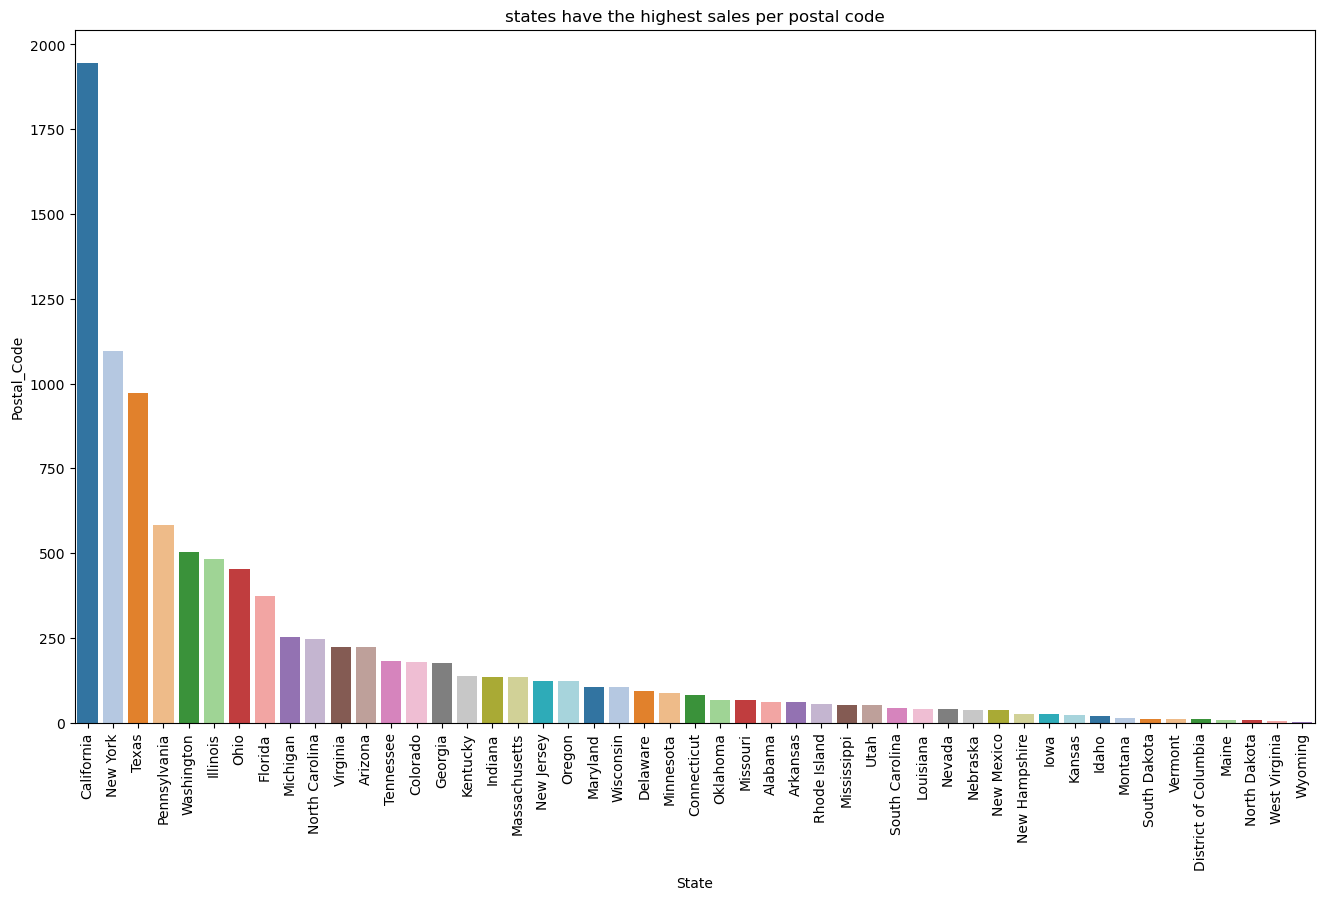

In [100]:
plt.figure(figsize=(16,9))
sns.barplot(data=highest_sales_per_postal_code,x="State",y="Postal_Code",palette="tab20")
plt.title("states have the highest sales per postal code")
plt.xticks(rotation=90)
plt.show()

In [92]:
df.head()

,Row_ID,Order_ID,Order_Date,Ship_Date,Ship_Mode,Customer_ID,Customer_Name,Segment,Country,City,...,Postal_Code,Region,Product_ID,Category,Sub_Category,Product_Name,Sales,Delivery_Days,Months,Year
0,1,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,3,11,2017
1,2,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,11,2017
2,3,CA-2017-138688,2017-06-12,2017-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,4,6,2017
3,4,US-2016-108966,2016-10-11,2016-10-18,Standard Class,SO-20335,Sean O Donnel,Consumer,United States,Fort Lauderdale,...,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,7,10,2016
4,5,US-2016-108966,2016-10-11,2016-10-18,Standard Class,SO-20335,Sean O Donnel,Consumer,United States,Fort Lauderdale,...,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold N Roll Cart System,22.3680,7,10,2016
